# Hexike Basis and Rotations
Below we go through how to work with the `JWSTPrimaryAperture` class for generating an exact basis over the James Webb space telescope primary aperture. This is probably(?) the leading implementation in that the exact (non)-hexagons from the aperture are used and unique basis are created over them. In addition rotations translations and general alignment issues can be diagnosed with respect to each mirror individually.

At present the archilies heal of this project is the speed.

In [1]:
from layers import *
from matplotlib import pyplot
from webbpsf.optics import WebbPrimaryAperture
from poppy import PhysicalFresnelWavefront
from astropy.units import meter

First we generate the aperture over a square pixel grid. Below I have chosen 1008 by 1008 to be the size of the full aperture. This means that each mirror is approximately(!) contained in a 200 by 200 square.

To generate an image of the aperture we simply call `_aperture` with no arguments and it does the rest for us. Here you will notice the slowness that we discussed above. Better array routines are being investigated but it is a low priority for the early release. 

Lets check how well we are doing compared with `WebbPSF` a package built be the creators of the Telescope. Just ignore the spyder that is present in their implementation. 

In [2]:
jwst_primary = JWSTPrimaryAperture(1008)
jwst_primary_aperture = jwst_primary._aperture()

In [3]:
webbpsf_jwst_primary = WebbPrimaryAperture()
webbpsf_jwst_primary_aperture = \
    webbpsf_jwst_primary.get_transmission(PhysicalFresnelWavefront(1.67 * meter))

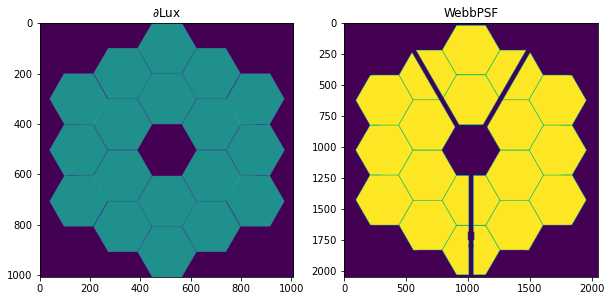

In [4]:
pyplot.figure(figsize=(10, 20))
pyplot.subplot(1, 2, 1)
pyplot.imshow(jwst_primary_aperture)
pyplot.title("$\partial$Lux")
pyplot.subplot(1, 2, 2)
pyplot.imshow(webbpsf_jwst_primary_aperture)
pyplot.title("WebbPSF")
pyplot.show()

You can clearly see the deviations present in the $\partial$Lux model. This is probably a bug, but I have been summoned to do other work so for now it stays.

Now we may consider the aligment of a mirror, for example "B1-7" and rotate it slightly with respect to the other mirrors. In this case I have chosen a rather extreme rotation of $0.05$ radian. Typically values would be much much less. 

To demonstrate the other capabilities of the model all the available parameters of the mirror have been tuned. 

In [4]:
jwst_primary["B1-7"] = jwst_primary["B1-7"]\
    .set_theta(0.05)\
    .set_shear(0.05)\
    .set_x_offset(0.05 + jwst_primary["B1-7"].get_centre()[0])\
    .set_y_offset(0.05 + jwst_primary["B1-7"].get_centre()[1])\
    .set_magnification(1.001)
jwst_primary_aperture = jwst_primary._aperture()

Text(0.5, 1.0, '$\\partial$Lux')

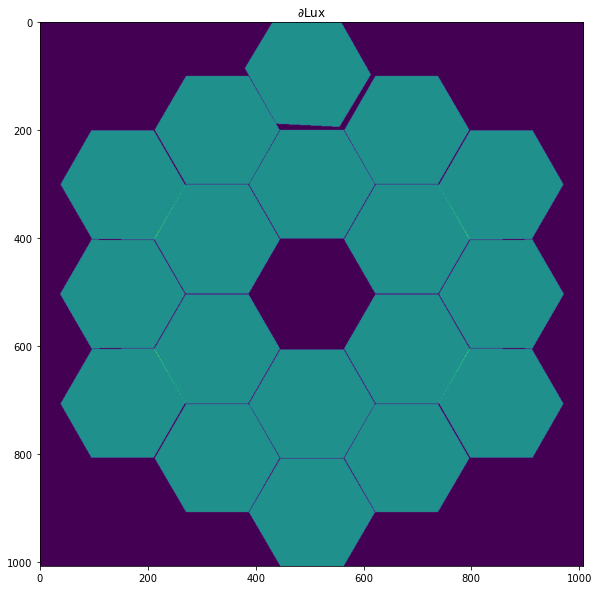

In [6]:
pyplot.figure(figsize=(10, 10))
pyplot.imshow(jwst_primary_aperture)
pyplot.title("$\partial$Lux")

Now we want to generate a basis over the mirrors in there exact state. We can do this using the `CompoundBasis` class from `dLux`. This is where the computational efficiency really hits the fan. At the momement this is too slow to be feesible in large scale calculations, but it is still dope AF. Notice the displace "B1-7" mirror.

In [5]:
basis = CompoundBasis(9, jwst_primary)

In [6]:
plotable_basis = basis_tensor.sum(axis=0)

In [7]:
b = np.stack(basis)

In [8]:
b = b.sum(axis=0)

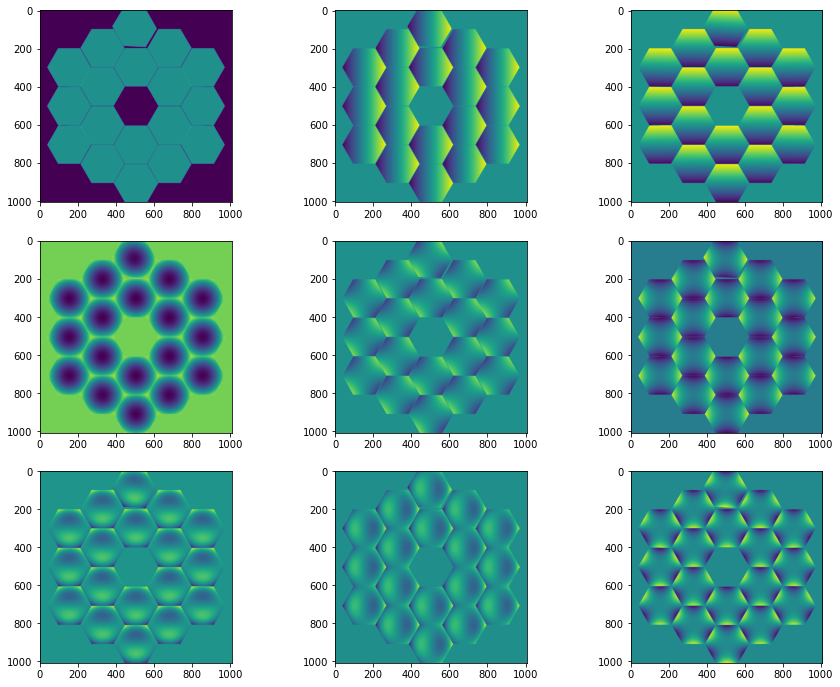

In [9]:
pyplot.figure(figsize=(15, 12))
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(plotable_basis[i])